In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hotel = pd.read_csv("hotel_bookings.csv")

/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_35033/904375341.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = hotel.groupby(['lead_time_group', 'is_canceled']).size().unstack(fill_value=0)


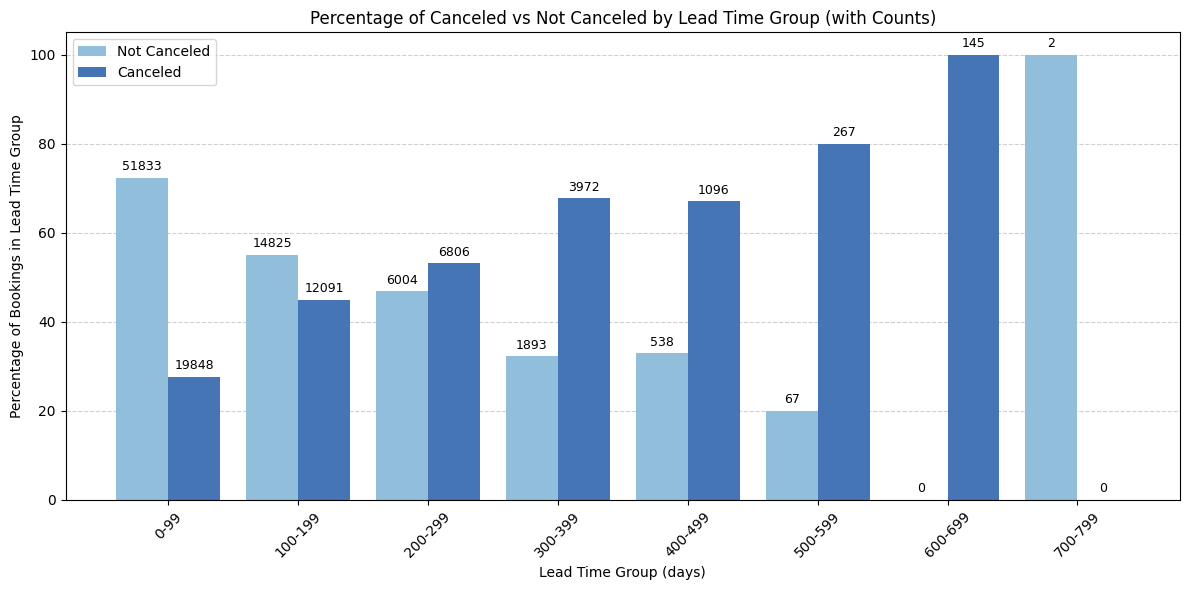

In [3]:
# create 100-day bins
bins = range(0, int(hotel['lead_time'].max()) + 100, 100)
labels = [f"{b}-{b+99}" for b in bins[:-1]]
# create a new column with the groups
hotel['lead_time_group'] = pd.cut(hotel['lead_time'], bins=bins, labels=labels, right=False)

# group data by lead time group and cancellation status  
# use unstack() to reshape the result into a DataFrame with cancellation statuses as columns
grouped = hotel.groupby(['lead_time_group', 'is_canceled']).size().unstack(fill_value=0)

# new DataFrame with the percentages for each group of canceled and not canceled bookings within each lead time group
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# we are going to need as many x ticks as groups of days
x = list(range(len(grouped)))
bar_width = 0.4

# plot grouped bars with value labels
plt.figure(figsize=(12, 6))

# plot bars for not canceled bookings, i is the enumeration of the bar and val takes the actual percentage
for i, val in enumerate(percentages[0.0]):
    # count takes the total number of bookings in that group
    count = int(grouped.iloc[i, 0])
    # the if statement makes sure that the label only appears once in the legend
    bar = plt.bar(x[i] - bar_width/2, val, width=bar_width, color='#91bfdb', label='Not Canceled' if i == 0 else "")
    plt.text(x[i] - bar_width/2, val + 1, str(count), ha='center', va='bottom', fontsize=9)

# plot bars for canceled bookings
for i, val in enumerate(percentages[1.0]):
    count = int(grouped.iloc[i, 1])
    bar = plt.bar(x[i] + bar_width/2, val, width=bar_width, color='#4575b4', label='Canceled' if i == 0 else "")
    plt.text(x[i] + bar_width/2, val + 1, str(count), ha='center', va='bottom', fontsize=9)


plt.title("Percentage of Canceled vs Not Canceled by Lead Time Group (with Counts)")
plt.xlabel("Lead Time Group (days)")
plt.ylabel("Percentage of Bookings in Lead Time Group")
plt.xticks(ticks=x, labels=percentages.index, rotation=45)
plt.legend()
# ensure grid lines appear beneath the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

This study explores the relationship between lead time and booking cancellations to determine an optimal booking window to reduce cancellations and thus maximize occupancy. Using these findings a hotel could implement either limits or incentives to encourage booking to take place within this window. This would reduce the total number of cancellations, making the expected occupancy more consistent, leading to a better revenue flow.

To address this question I focused on the “lead_time” variable (how many days in advance did the customer book), and the “is_canceled” variable (whether the booking was cancelled). I visualized the results using a bar chart showing the percentages between canceled/not canceled bookings and grouped them in 100-day bins, and added the total number of bookings for each bar to indicate significance.

The bookings with the least cancellation percentage were customers who booked within the first 100 days, from then on cancellations rise progressively, until they exceed non-cancellations in the (200-299) day group. There is an outlier in the day group (700-799) but there were only two bookings so it is not statistically meaningful. The optimal lead time for a booking appears to be 0-200 days before the stay. Hotels could limit or incentive advance booking windows to 300 days (for flexibility), to reduce cancellations and improve occupancy predictability.



In [6]:
hotel.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'lead_time_group'],
      dtype='object')

Overall mark: 59

#### Business Question
The business question proposed is clearly stated, and is useful and insightful for the hotel industry. The question is also relevant to the given dataset, and is well answered by utilizing the variables in the data.

<u> Very good </u>

#### Data
Two key variables, "lead_time" and "is_canceled" are employed to answer the proposed question. However, the reason why these two variables can be explained more explicitly and clearly. The creation of a new variable "lead_time_group" which encode the numerical lead time to categorical group classes demonstrates good data processing skill. The use of "lead_time" and "is_canceled" is some what limited. To further improve this part, consider to use more variables that might be correlated with booking cancellations, e.g. "deposite_type", "customer_type".

<u> Good </u>

#### Visualization
The bar chart is clearly presented for the visualization purpose. Titles, axis lables, ticks are displayed appropriately. Necessary legends and numerical annotations for each bar are provided. However, it can be misleading that the height of a bar is designed to represent its percentage in a group, while the numerical annotation on the top is the absolute number of bookings (these two quantities are in very different magnitude and direction). You can consider to use different types of plots to show to quantities separately.

<u> Pass </u>

#### Code
The code structure is clear and straightforward to follow. Comments are provided where necessary. The code readability can be improved if different lines of codes are put in different cells.

<u> Good </u>

In [9]:
(50 + 60 + 60 + 70) / 4

60.0